In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pickle as pickle

import sys
path = '../../scripts/'
sys.path.insert(0,path)
from ripser_to_dict import *
#from plot_persistence import *

In [8]:
with open('params.pickle','rb') as f:
    params = pickle.load(f)

## Functions

In [3]:
def closest_pixel(PD,im_size,max_persistence):
    
    """Moves points to nearest intersection in a grid. Input is a collection of (b,d)-points."""
    
    width = im_size[0]
    height = im_size[1]
    
    out_im = np.zeros((height,width))
    rx = max_persistence/(float)(width - 1)
    ry = max_persistence/(float)(height - 1)
    n_points = PD.shape[0]
    
    for y in range(height):
        for x in range(width):
            for n in range(n_points):
                its_close_to_x = -rx/2. < PD[n,0] - rx*x < rx/2.
                its_close_to_y = -ry/2. < PD[n,1] - ry*y < ry/2.
                if its_close_to_x and its_close_to_y:
                    out_im[y,x] += 1
                    
    out_im = np.flipud(out_im)
    
    return out_im

In [4]:
def create_mnist_library(params):
    
    im_size = [28, 28]
    channel = params['architecture']['channel']
    
    for shape in params['shapes']['names']:
        for seed in params['shapes']['all_seeds']:
            with open(params['paths']['code_to_data'] + 'persistences/'\
                      + shape + '/' + str(seed) + '.pickle', \
                      'rb') as f:
                temp = pickle.load(f)
            PD = temp[channel].copy()
            del temp
            out_im = closest_pixel(PD,im_size,params['ripser']['max_persistence'])
            np.savetxt(params['paths']['code_to_data'] + 'pixelations/mnist/'\
                       + shape + '/' + str(seed) + '-' + str(channel) + '.dat',\
                       out_im, delimiter=',')

In [5]:
def create_cifar_library(params):
    
    im_size = [32, 32]
    channels = params['architecture']['channels']
    
    percent_complete = 0
    for seed in params['shapes']['all_seeds']:
        for shape in params['shapes']['names']:
            temp = {}
            with open(params['paths']['code_to_data'] + 'persistences/'\
                      + shape + '/' + str(seed) + '.pickle', \
                      'rb') as f:
                temp = pickle.load(f)
            for channel in channels:
                if channel in temp:
                    PD = temp[channel].copy()
                    out_im = closest_pixel(PD,im_size,params['ripser']['max_persistence'])
                else:
                    out_im = np.zeros(im_size)
                np.savetxt(params['paths']['code_to_data'] + 'pixelations/cifar/'\
                       + shape + '/' + str(seed) + '-' + str(channel) + '.dat',\
                       out_im, delimiter=',')
                percent_complete += 100. / (len(params['shapes']['names'])\
                                            * len(params['shapes']['all_seeds'])\
                                            * len(channels))
                sys.stdout.write('\rCurrently, %d percent complete in creating cifar library.' %round(percent_complete))
                sys.stdout.flush()

## Run

In [6]:
architecture = params['architecture']['name']
if architecture == 'mnist':
    create_mnist_library(params)
elif architecture == 'cifar':
    create_cifar_library(params)

Currently, 100 percent complete in creating cifar library.

## Test

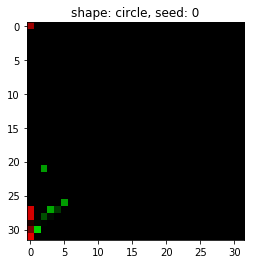

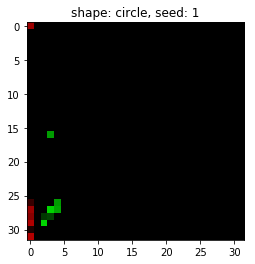

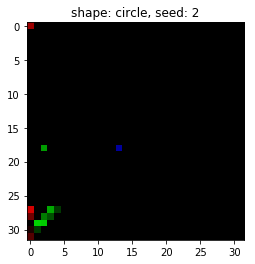

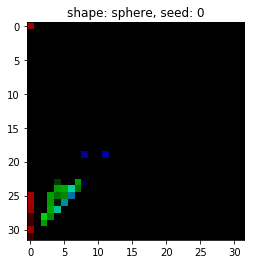

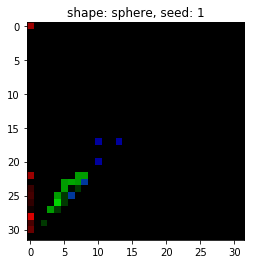

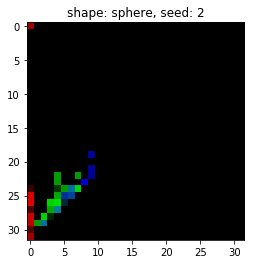

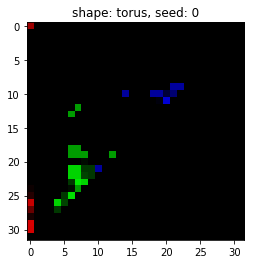

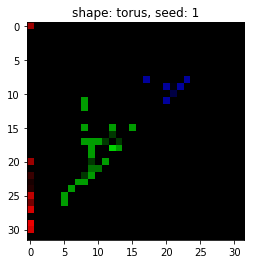

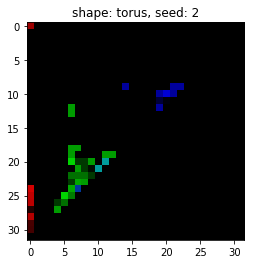

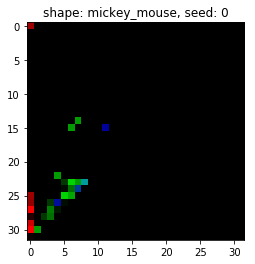

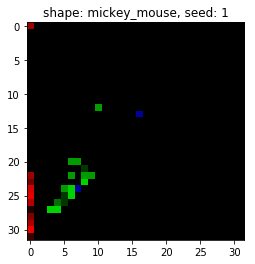

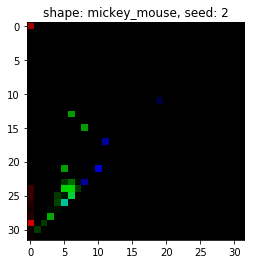

In [7]:
im_out = np.zeros((32,32,3))
for shape in params['shapes']['names']:
    for seed in [0,1,2]:
        for channel in [0,1,2]:
            im_out[:,:,channel] = np.loadtxt(params['paths']['code_to_data'] + 'pixelations/cifar/'\
                       + shape + '/' + str(seed) + '-' + str(channel) + '.dat',\
                       delimiter=',')
        plt.imshow(im_out*100)
        plt.title('shape: ' + shape + ', seed: ' + str(seed))
        plt.show()

In [ ]:
# Comment it would be better to have the seeds as the outer loop.